# NDVI and Temperature

In [1]:
# let's load in the RGBN file
import landsat_sample_functions as lf

#where your data lives on the compute
rgbdatafile = "../data/landsat_RGBN.txt"
rgbn = lf.landsat_read(rgbdatafile)

In [3]:
# extract colors
red = rgbn[...,0]
green = rgbn[...,1]
blue = rgbn[...,2]

#extract near infrared channel from rgb
nir = rgbn[...,3]

In [4]:
nir = rgbn[...,3]
red = rgbn[...,0]

In [5]:
# Let's compute vegetation! 
def NDVI(nir, red):
    return (nir-red)/(nir+red)

In [6]:
# Call the ndvi function to get the results
ndvi = NDVI(nir, red)

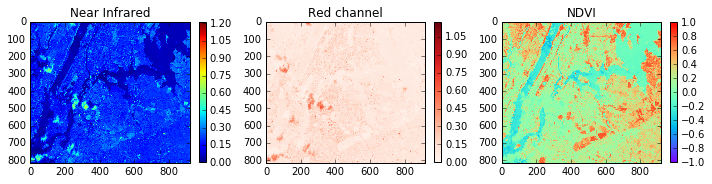

In [12]:
# let's look at those components 

%matplotlib inline
import matplotlib.pyplot as plt
#import cmocean

fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,30))

nim = ax1.imshow(nir, vmin=0)
#fraction shrinks the colorbar so that it fits nicely
fig.colorbar(nim, ax=ax1, fraction=.04)
ax1.set_title("Near Infrared")

rim = ax2.imshow(red, cmap="Reds", vmin=0)
fig.colorbar(rim, ax=ax2, fraction=.04)
ax2.set_title("Red channel")

ndim = ax3.imshow(ndvi, vmin=-1, vmax=1, 
                  cmap='rainbow')
fig.colorbar(ndim, ax=ax3, fraction=.04)
ax3.set_title("NDVI")

fig.tight_layout()

# Review
Compute and plot the histograms of:
1. near infrared data
2. red channel data
2. ndvi data

Scales are totally different, so how do we see if there's a relationship? 
Scatter plots!

Because the images are the same size, the pixels are at the same latitude and longitude and that relationship is preserved even when the data is flattened. 

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

#scatter puts the nir data on the x axis, temperature on y
ax.scatter(nir.flatten(), ndvi.flatten())

ax.set(xlabel = "NIR", ylabel="NDVI", aspect="equal")
fig.show()

In [ ]:
# Let's make those dots smaller

fig, ax = plt.subplots()

#s is the marker size
ax.scatter(nir.flatten(), ndvi.flatten(), s=.25)

ax.set(xlabel = "NIR", ylabel="NDVI", aspect="equal")
fig.show()

In [ ]:
# For a large number of values, use plot instead of scatter
fig, ax = plt.subplots(figsize=(5,5))
# '.' means plot with a . symbol
ax.plot(nir.flatten(), ndvi.flatten(), '.')

ax.set(xlabel = "NIR", ylabel="NDVI", aspect="equal")
fig.show()

In [ ]:
# Can we fit a line?

import scipy.stats as st

x = nir.flatten()
y = ndvi.flatten()
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

In [ ]:
# how do we plot that? Equation of line: y = m*x + b 
# let's compute theoretical line

predicted_y = slope*x + intercept

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, '.')

ax.plot(x, predicted_y, color="black")

ax.set(xlabel = "NIR", ylabel="NDVI", aspect='equal')
fig.show()

In [ ]:
# Is it meaningful? 
# r_value = Pearson's r correlation coefficient 
# p_value = likelihood null hypothesis is true
# std_error = avg distance between predicted and actual value
r_value, p_value, std_err

# To do

See if the red channel is correlated with 
NDVI. Draw a scatter plot with a best fit line.

# Let's add in temperature

In [ ]:
ls ../data/

In [ ]:
#landsat_thermrad.txt
raddatafile = '../data/landsat_thermrad.txt'
thermrad = lf.landsat_read(raddatafile)

In [ ]:
# convert thermal radiance to temperature
temps = lf.BT(thermrad,10.9,1)

In [ ]:
temps_c = temps - 273.15
temps_f = (9/5)*temps_c + 32
temps.min(), temps.max()

# To do
1. Plot the temperature data as a heat map
2. Compute the probability density of the temperature values
3. Plot the temperature against the NDVI, compute the best fit line, and see if there's a correlation